# LV 2.

조이스틱

https://school.programmers.co.kr/learn/courses/30/lessons/42860

**문제 설명**

    조이스틱으로 알파벳 이름을 완성하세요. 맨 처음엔 A로만 이루어져 있습니다.
    ex) 완성해야 하는 이름이 세 글자면 AAA, 네 글자면 AAAA

    조이스틱을 각 방향으로 움직이면 아래와 같습니다.

    ▲ - 다음 알파벳
    ▼ - 이전 알파벳 (A에서 아래쪽으로 이동하면 Z로)
    ◀ - 커서를 왼쪽으로 이동 (첫 번째 위치에서 왼쪽으로 이동하면 마지막 문자에 커서)
    ▶ - 커서를 오른쪽으로 이동 (마지막 위치에서 오른쪽으로 이동하면 첫 번째 문자에 커서)

    예를 들어 아래의 방법으로 "JAZ"를 만들 수 있습니다.

    - 첫 번째 위치에서 조이스틱을 위로 9번 조작하여 J를 완성합니다.
    - 조이스틱을 왼쪽으로 1번 조작하여 커서를 마지막 문자 위치로 이동시킵니다.
    - 마지막 위치에서 조이스틱을 아래로 1번 조작하여 Z를 완성합니다.
    따라서 11번 이동시켜 "JAZ"를 만들 수 있고, 이때가 최소 이동입니다.

    만들고자 하는 이름 name이 매개변수로 주어질 때, 이름에 대해 조이스틱 조작 횟수의 최솟값을 return 하도록 solution 함수를 만드세요.

**제한사항**

    name은 알파벳 대문자로만 이루어져 있습니다.
    name의 길이는 1 이상 20 이하입니다.

**입출력 예**

![](https://velog.velcdn.com/images/heyggun/post/c5b4d4f6-27cb-4348-a1c4-398df0959e1e/image.png)



    ※ 공지 - 2019년 2월 28일 테스트케이스가 추가되었습니다.
    ※ 공지 - 2022년 1월 14일 지문 수정 및 테스트케이스가 추가되었습니다. 이로 인해 이전에 통과하던 코드가 더 이상 통과하지 않을 수 있습니다.


In [22]:
from collections import deque

def solution(maps):
    rows,cols = len(maps), len(maps[0])
    x,y,dist = 0,0,0 
    dx = [-1, 1, 0, 0] 
    dy = [0, 0, -1, 1]
    queue = deque()
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    opened = False 
    

    for i,row in enumerate(maps) :
        if 'S' in row :
            j = row.index('S')
            x,y,dist= i,j,0
            visited[i][j] = True 

    while True :
        for i in range(4) :
            NEXT = [x + dx[i], y + dy[i]] 
            if 0 <= NEXT[0] < rows and 0 <= NEXT[1] < cols and not visited[NEXT[0]][NEXT[1]] and maps[NEXT[0]][NEXT[1]] != 'X':
                queue.append([NEXT[0], NEXT[1], dist + 1])
                visited[NEXT[0]][NEXT[1]] = True 

        if len(queue) != 0 :
            x,y,dist= queue.popleft() 
        else :
            dist = -1
            break
        
        if not opened and maps[x][y] == 'L' :
            opened = True
            visited = [[False for _ in range(cols)] for _ in range(rows)] 
            visited[x][y] = True 
            queue = deque()
            queue.append([x, y, dist]) 
        
        if opened and maps[x][y] == 'E' : 
            break
    
    return dist

In [21]:
print(solution(["SOOOL","XXXXO","OOOOO","OXXXX","OOOOE"]))
print(solution(["LOOXS","OOOOX","OOOOO","OOOOO","EOOOO"]))

16
-1


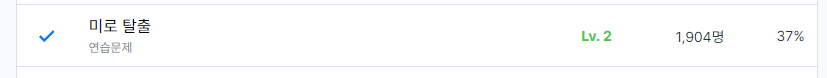

In [10]:
from collections import deque

maps = ["LOOXS","OOOOX","OOOOO","OOOOO","EOOOO"]

position = [(1,0), (-1,0), (0,1), (0,-1)]
visited = [[False]*len(maps[0]) for _ in range(len(maps))]
OPEN = False
x,y,dist = 0,0,0
queue = deque()

for i in range(len(maps)):
    for j in range(len(maps[0])):
        if maps[i][j] == 'S':
            x,y,dist = i,j,0
            visited[i][j]= True
            
while True:
    for idx in range(len(position)):
        dx, dy = x+position[idx][0], y+position[idx][1]
        if 0<=dx<len(maps) and 0<=dy<len(maps[0]) and not visited[dx][dy] and maps[dx][dx] != 'X':
            queue.append([dx, dy, dist+1])
            visited[dx][dy] = True
            
    if len(queue)!=0:
        x,y,dist = queue.popleft()
    else:
        dist = -1
        break
        
    if not OPEN and maps[x][y] == 'L':
        OPEN=True
        visited = [[False]*len(maps[0]) for _ in range(len(maps))]
        visited[x][y] = True
        queue = deque()
        queue.append([x,y,dist])
        
    if OPEN and maps[x][y] == 'E':
        break
        
dist

8